## Import the dataset iris_dirty.csv from this repo into a Pandas dataframe. Check the Pandas documentation of read_csv() and use the column names sepal_length, sepal_width, petal_length, petal_width and class when you read in the data.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import RobustScaler

In [2]:
Column_list = ["sepal_length", "sepal_width", "petal_length","petal_width","class"]
df = pd.read_csv("iris_dirty.csv", names=Column_list)

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length
count,151.000000,150.000000,151.000000
mean,6.196689,3.057333,3.764901
std,4.324325,0.432776,1.760197
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


## Explore the data with the known Pandas functions head(), info(), describe(), count(), value_counts() (for all columns). Watch for missing values, duplicates, spelling errors, non-uniform units, columns with datatypes they shouldn't have etc.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length
count,151.000000,150.000000,151.000000
mean,6.196689,3.057333,3.764901
std,4.324325,0.432776,1.760197
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


In [7]:
df.count()

sepal_length    151
sepal_width     150
petal_length    151
petal_width     151
class           151
dtype: int64

In [8]:
df['sepal_width']=df['sepal_width'].fillna(df['sepal_width'].mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   151 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [10]:
df[df.duplicated()].head()

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,1 mm,Iris-setosa
37,4.9,3.1,1.5,1 mm,Iris-setosa
100,7.0,3.2,4.7,14 mm,Iris-versicolor


In [11]:
df=df.drop_duplicates()

In [12]:
df=df.reset_index(inplace=False, drop=True)

In [13]:
df['class'].unique()

array(['Iris-setosa', 'Iris-setsoa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [14]:
df['class']=df['class'].replace('Iris-setsoa','Iris-setosa')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    object 
 4   class         148 non-null    object 
dtypes: float64(3), object(2)
memory usage: 5.9+ KB


In [16]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        48
Name: class, dtype: int64

## Substitute missing values with the column mean. Check/remove duplicates. Correct possible spelling errors.

In [17]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

## Bring all columns to centimeter length. Before, transform any column to numeric if necessary.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    object 
 4   class         148 non-null    object 
dtypes: float64(3), object(2)
memory usage: 5.9+ KB


In [19]:
df['petal_width']=df.petal_width.str.extract('(\d+)')
df['petal_width']=df['petal_width'].astype(float)
df['petal_width'] = df['petal_width'] / 10

df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    float64
 4   class         148 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Check for outliers with .describe() or means of plotting. Think about the appropriate way to correct for possible outliers and perform that correction.

In [21]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,148.000000,148.000000,148.000000,148.000000
mean,6.208784,3.055793,3.789189,1.213514
std,4.365089,0.435520,1.756470,0.757426
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


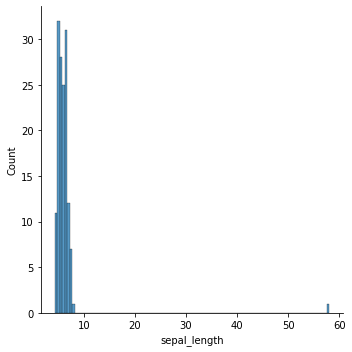

In [22]:
sns.displot(df['sepal_length']);

In [23]:
df["sepal_length"].max()

58.0

In [24]:
# The best way to correct this outlier is by dividing the numberby 10 since the most probable is that there was an error of a coma or dot when introducing the value

df['sepal_length']= df['sepal_length'].replace(58,5.8)

In [25]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,148.000000,148.000000,148.000000,148.000000
mean,5.856081,3.055793,3.789189,1.213514
std,0.826288,0.435520,1.756470,0.757426
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


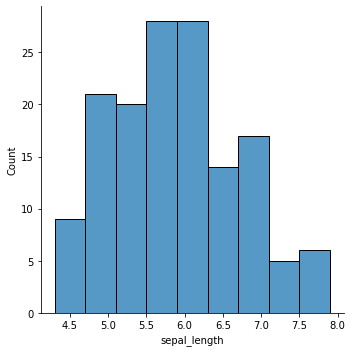

In [26]:
sns.displot(df['sepal_length']);

## Plot a correlation matrix with a heatmap between the numeric features.

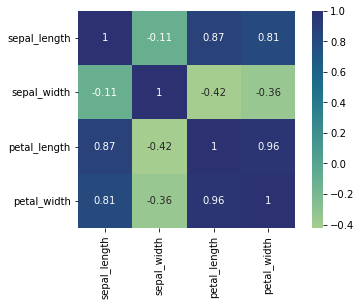

In [27]:
sns.heatmap(df.corr(), cmap='crest', annot=True,square=True); 

## Model the relationship between our features (the four numeric flower metrics) and the label (class) with Logistic Regression using LogisticRegression() from the sklearn.linear_model module. For the purpose of model validation, use the known train-test-split method with a size parameter of 0.3. Calculate the predicted labels, the accuracy score of y_test and y_predicted and plot a confusion matrix of the two.

In [28]:
y = df['class'] 
X= df[['sepal_length', 'sepal_width','petal_length','petal_width']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 33)

In [30]:
classification=LogisticRegression(max_iter=500)

In [31]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [32]:
y_test_pred=classification.predict(X_test)

In [33]:
accuracy_score(y_test, y_test_pred)

0.9333333333333333

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [35]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 16]])

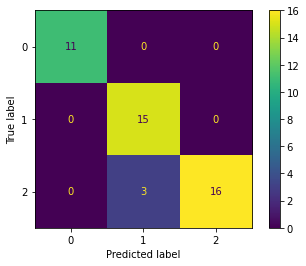

In [37]:
cmx=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

## BONUS: Use all the rows of your data and your trained model to predict the flower classes. Then create pairwise scatterplots between all four features (6 in total) in which you color the dots depending which predicted flower class they belong to. Try to make out distinct clusters in those plots.

In [38]:
from sklearn.metrics import classification_report
y_total_predict=classification.predict(X)

In [39]:
 print(classification_report(y, y_total_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        48
Iris-versicolor       0.89      0.96      0.92        50
 Iris-virginica       0.96      0.88      0.92        50

       accuracy                           0.95       148
      macro avg       0.95      0.95      0.95       148
   weighted avg       0.95      0.95      0.95       148



In [40]:
df['predict']=y_total_predict

In [41]:
df

,sepal_length,sepal_width,petal_length,petal_width,class,predict
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
143,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
144,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
145,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
146,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


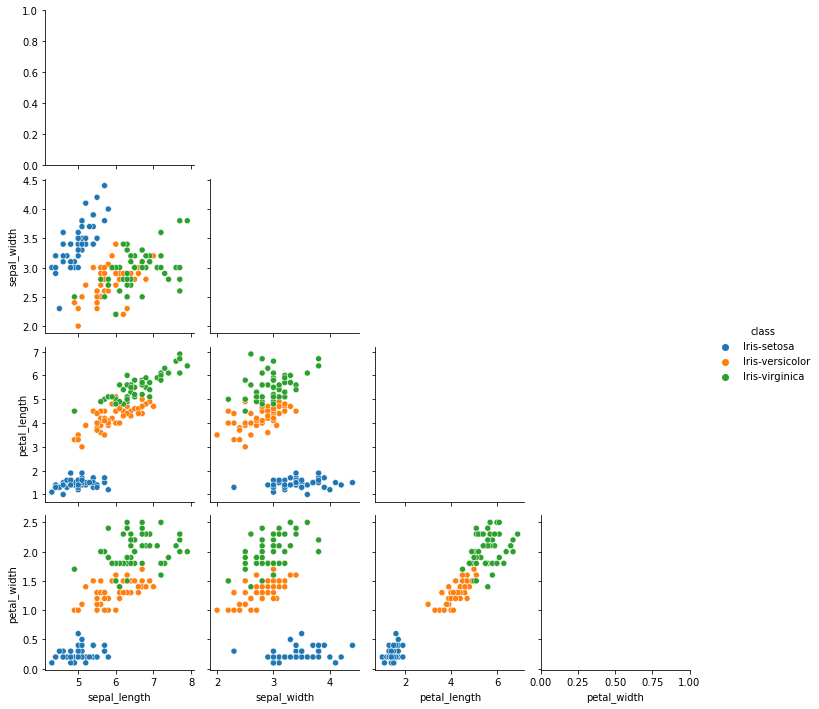

In [42]:
sns.pairplot(df, hue='class', corner=True, diag_kind='None');